In [5]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 667.8 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/38.8 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.4/38.8 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.6/38.8 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.7/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.8/38.8 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.0/38.8 MB 2.7 MB/s eta 0:00:14
   - ---------------

In [1]:
!pip install mediapipe

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/c1/0f/4dc0802131756a9fe4d46d2824352014b85a75baca386cb9e43057f39f15/mediapipe-0.10.14-cp311-cp311-win_amd64.whl.metadata
  Using cached mediapipe-0.10.14-cp311-cp311-win_amd64.whl.metadata (9.9 kB)
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/7e/cf/5f51b43bd692e90585c0ef6e8d1b0db5d254fe0224a6570daa59a1be014f/jax-0.4.31-py3-none-any.whl.metadata
  Using cached jax-0.4.31-py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/9f/e2/5b7d20ed550d156311587eee6e44c48971fe6c3b43f39e82dacda3875396/jaxlib-0.4.31-cp311-cp311-win_amd64.

In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence = 0.3, model_complexity = 2)

mp_drawing = mp.solutions.drawing_utils

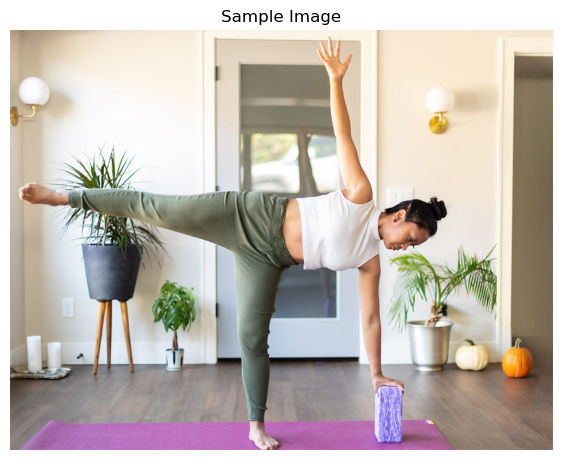

In [3]:
#Reading an image
sample_img = cv2.imread('images/img1.jpg')
plt.figure(figsize = [7,7])
plt.title('Sample Image'); plt.axis('off'); plt.imshow(sample_img[:, :, ::-1]);plt.show()

In [4]:
#Performing pose detection on the above image
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

#Checking for the found Lanmarks/Keypoints
if results.pose_landmarks:
    for i in range (2):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.726798296
y: 0.52208811
z: -0.29828018
visibility: 0.999993682

LEFT_EYE_INNER:
x: 0.739384234
y: 0.508885503
z: -0.28437233
visibility: 0.999951124



C:\Users\nk683\anaconda3\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [5]:
#Retrieve the height and width of the sample image
image_height, image_width, _ = sample_img.shape

#Checking for found landmarks
if results.pose_landmarks:
    for i in range (2):
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x*image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y*image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z*image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 872.1579551696777
y: 485.54194271564484
z: -357.9362154006958
visibility: 0.9999936819076538

LEFT_EYE_INNER:
x: 887.2610807418823
y: 473.2635176181793
z: -341.2467956542969
visibility: 0.9999511241912842



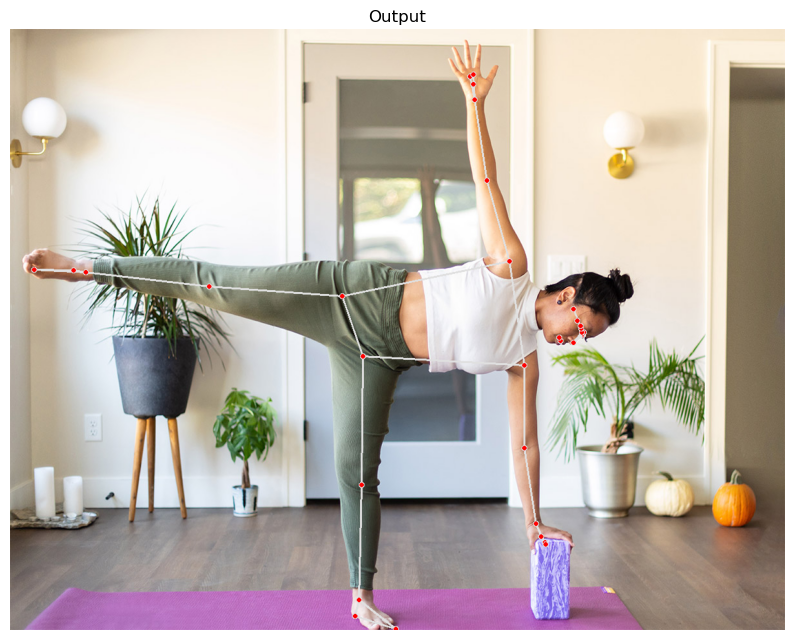

In [6]:
#Drawing skeleton on the sample image
#Create a copy of the sample image for drawing landmarks
img_copy = sample_img.copy()

#Checking for the found landmarks
if results.pose_landmarks:
    #Drawing them on sample image
    mp_drawing.draw_landmarks(image = img_copy, landmark_list = results.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize = [10,10])
    plt.title('Output'); plt.axis('off'); plt.imshow(img_copy[:,:,::-1]); plt.show()

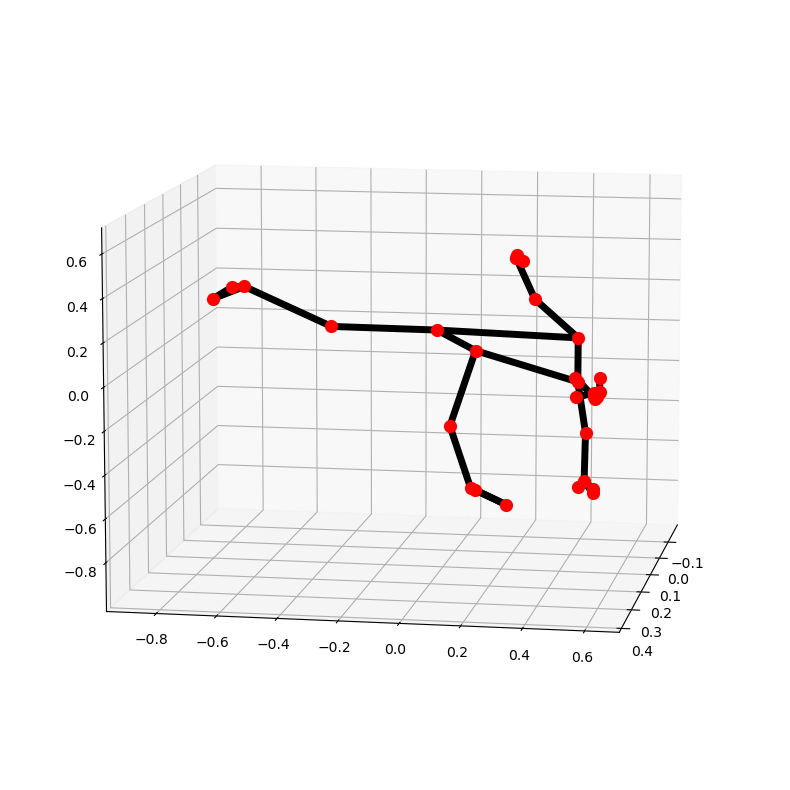

In [7]:
# Lets try in 3D
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [8]:
#WRAP-UP FUNCTION
def detectPose(image, pose, display = True):
    #copy image
    output_image = image.copy()
    # BGR to RGB
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #performing pose detection
    results = pose.process(imageRGB)
    #retrieving height and width of the image
    height, width, _ = image.shape
    #storing the detected landmarks
    landmarks = []
    #checking for detected landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image = output_image, landmark_list = results.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS)
        #Iterating
        for landmark in results.pose_landmarks.landmark:
            #appending into the list
            landmarks.append((int(landmark.x*width), int(landmark.y*height), (landmark.z*width)))

    if display:
        plt.figure(figsize=[20,20])
        plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title("Original Image"); plt.axis('off');
        plt.subplot(122); plt.imshow(output_image[:,:,::-1]); plt.title("Output Image"); plt.axis('off');

        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    else:
        return output_image, landmarks

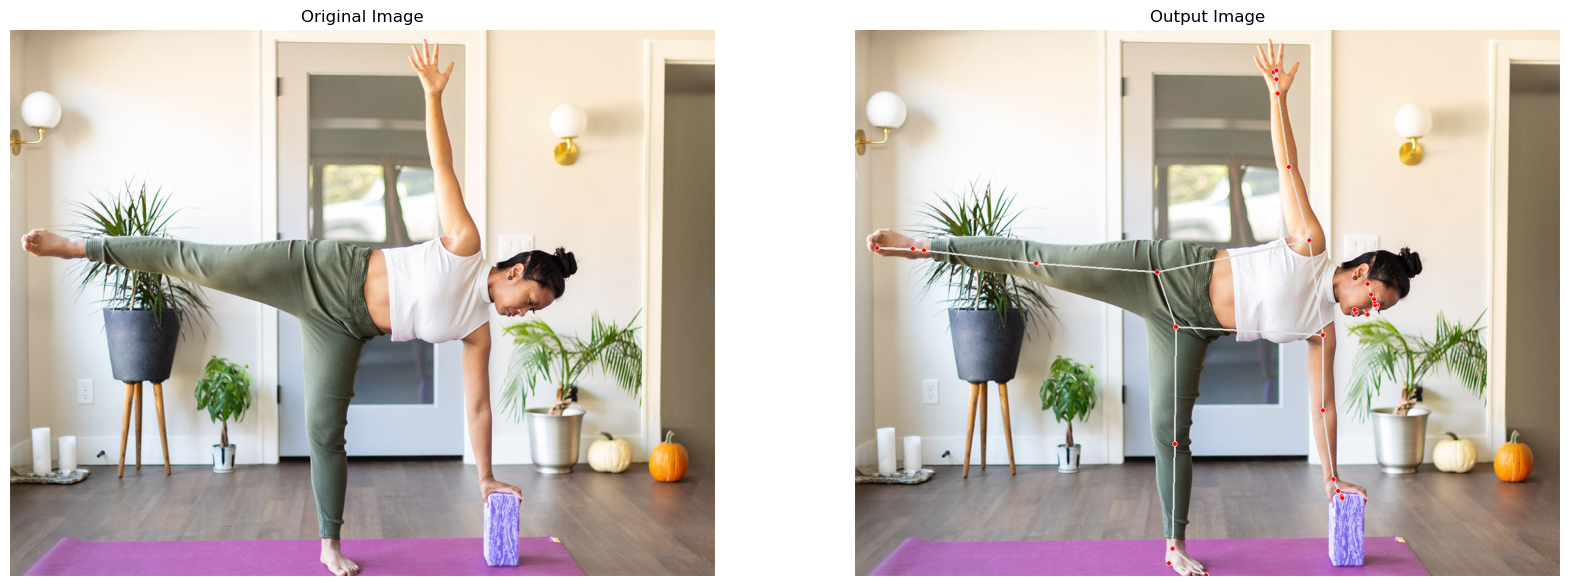

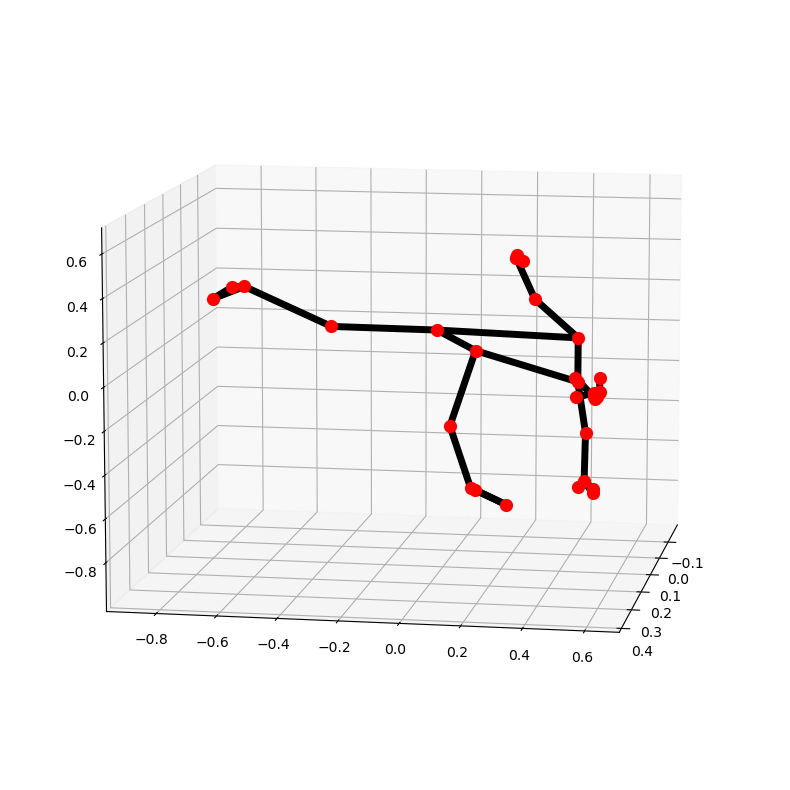

In [9]:
image = cv2.imread('images/img1.jpg')
detectPose(image, pose, display =True)

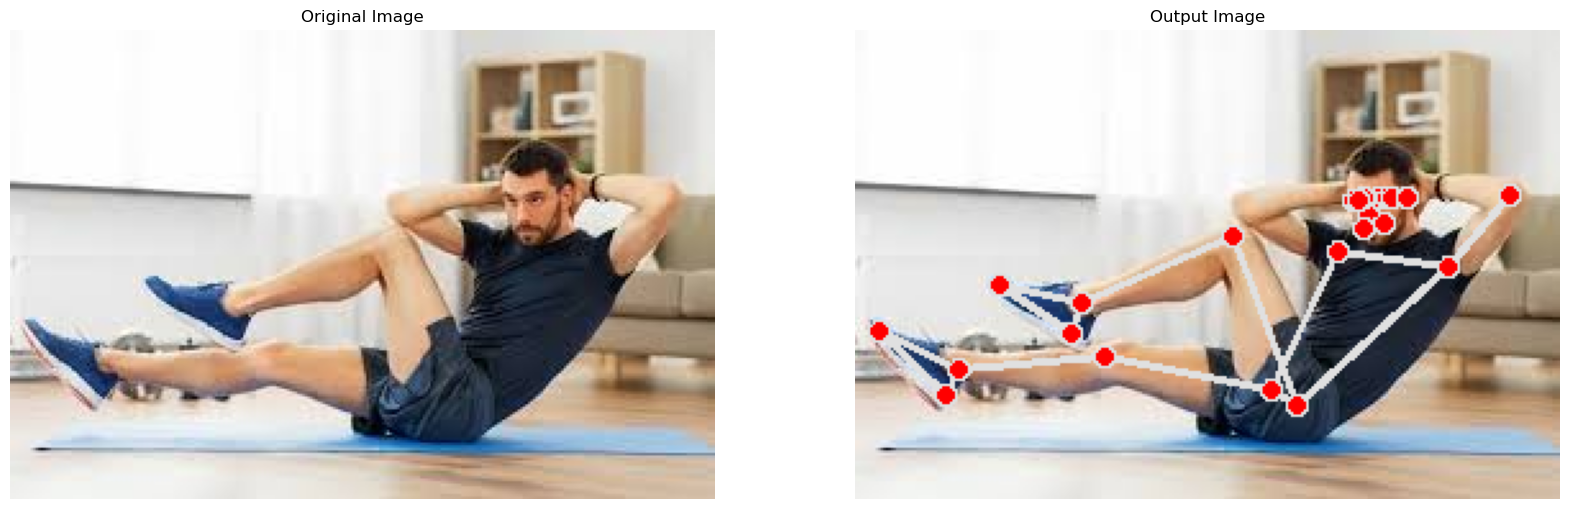

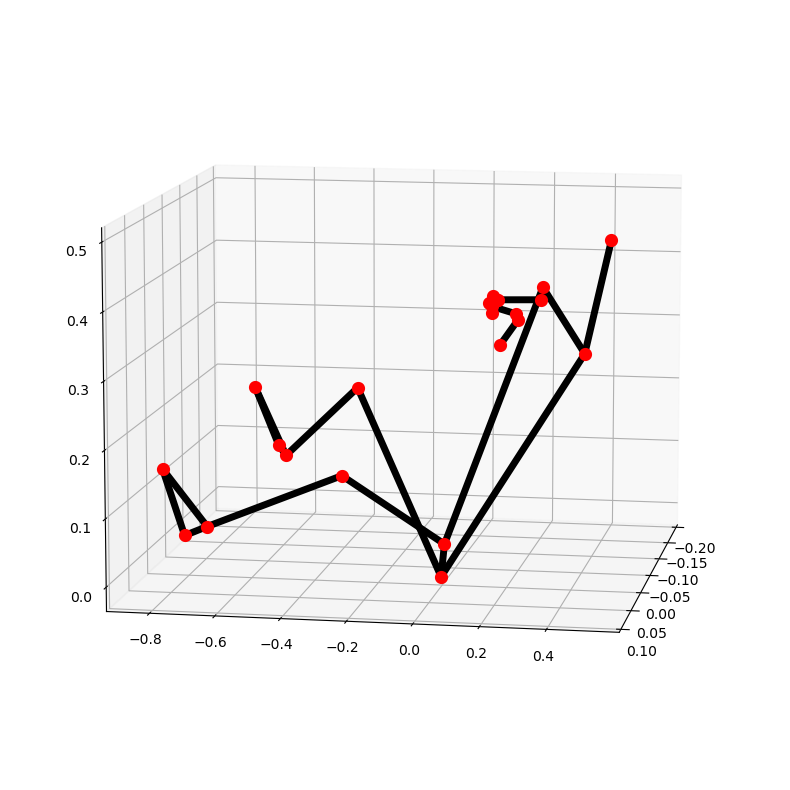

In [10]:
image = cv2.imread('images/he.jpeg')
detectPose(image, pose, display =True)

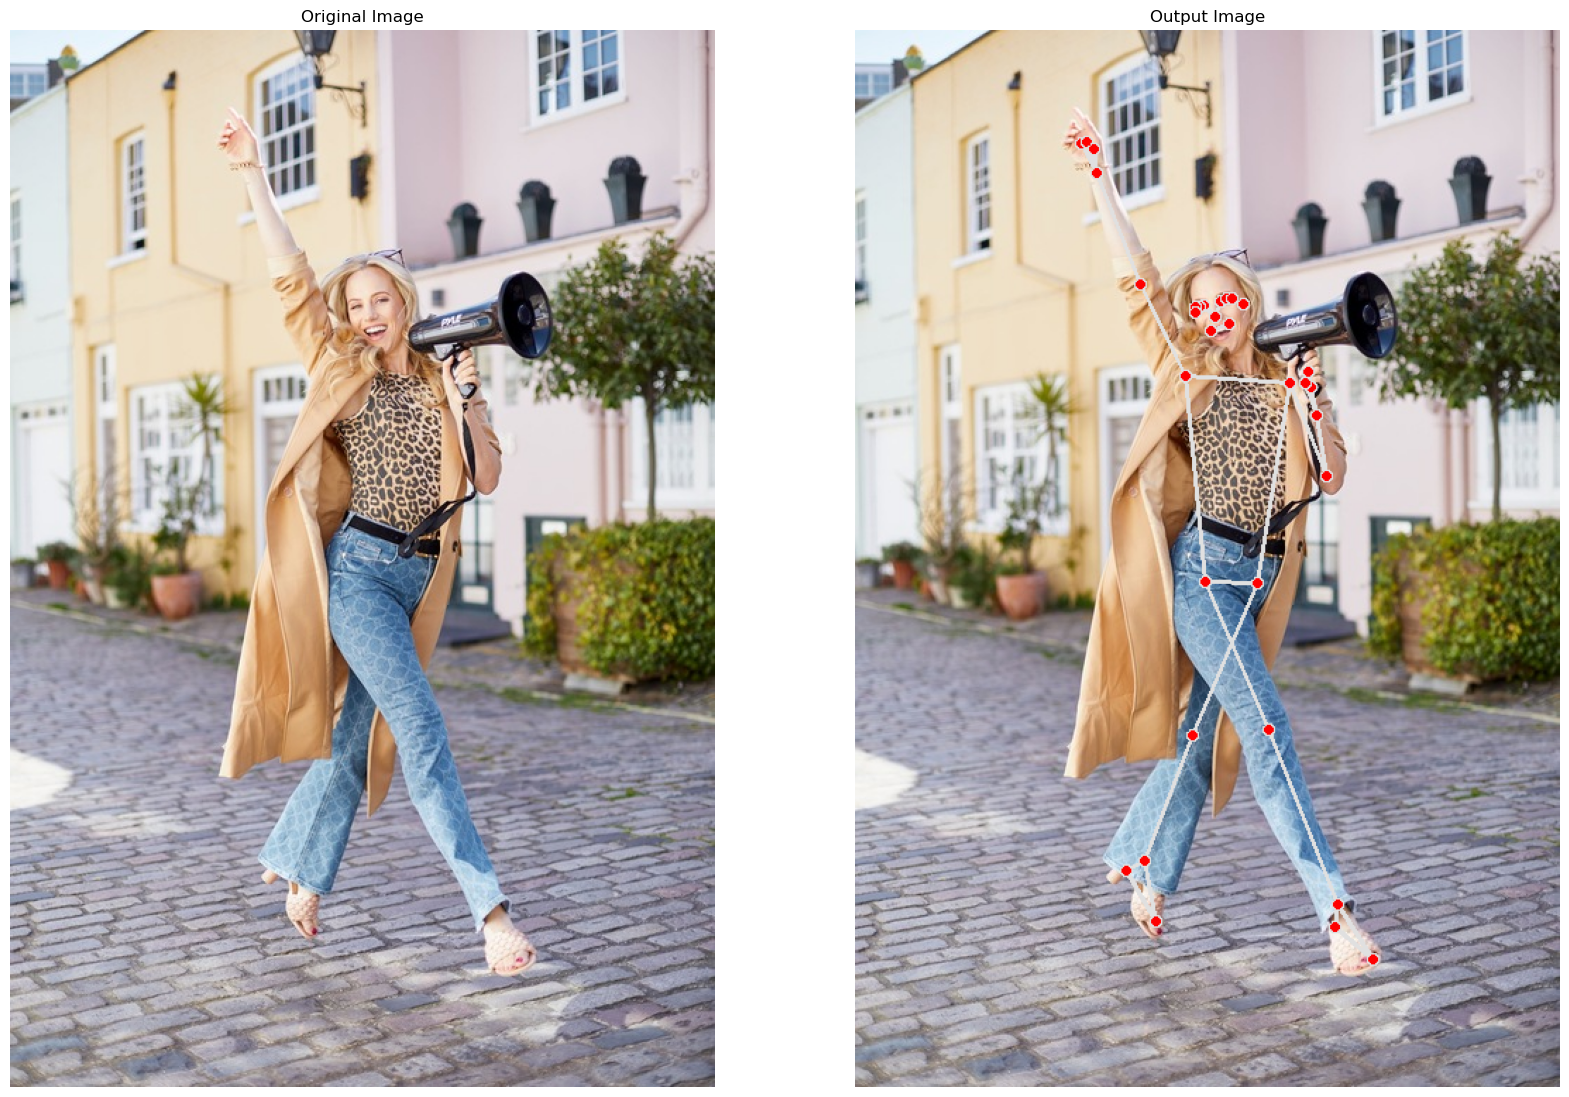

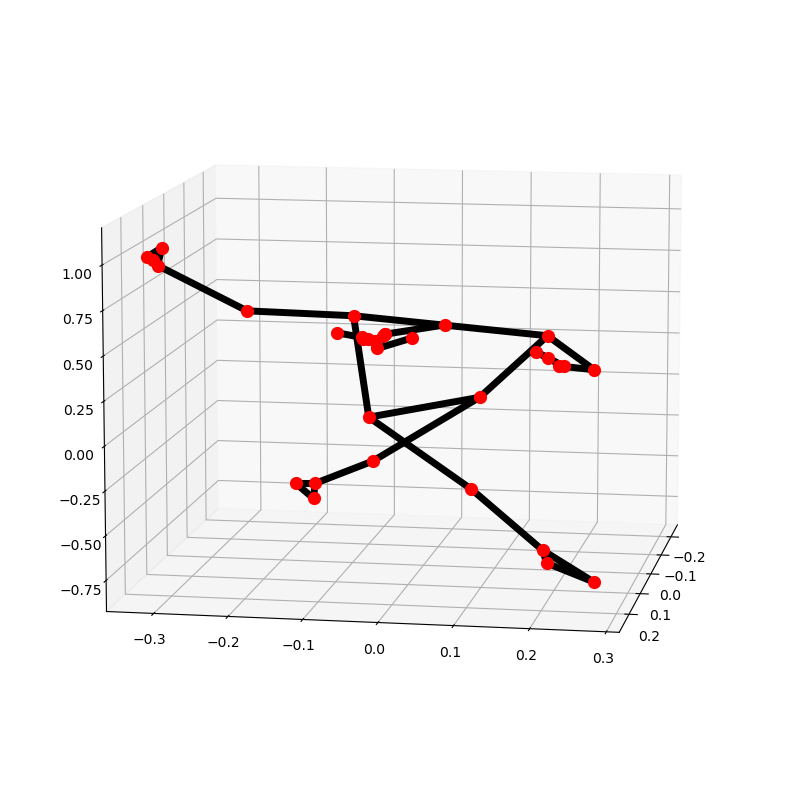

In [11]:
image = cv2.imread('images/img2.jpg')
detectPose(image, pose, display =True)

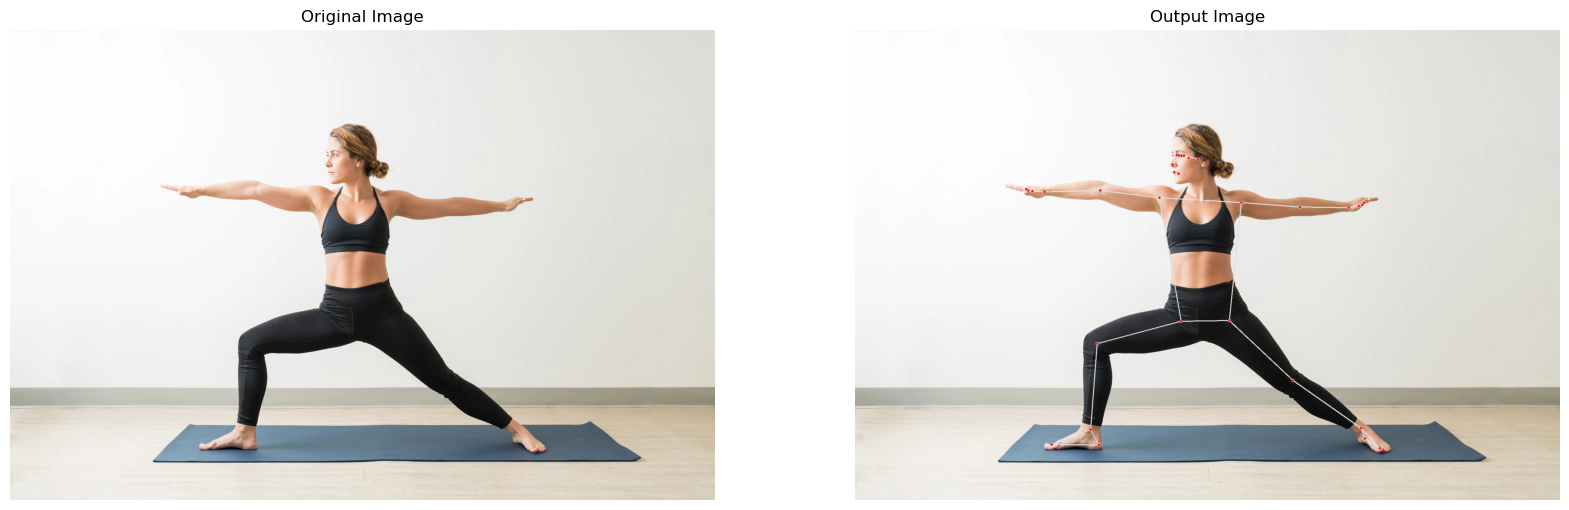

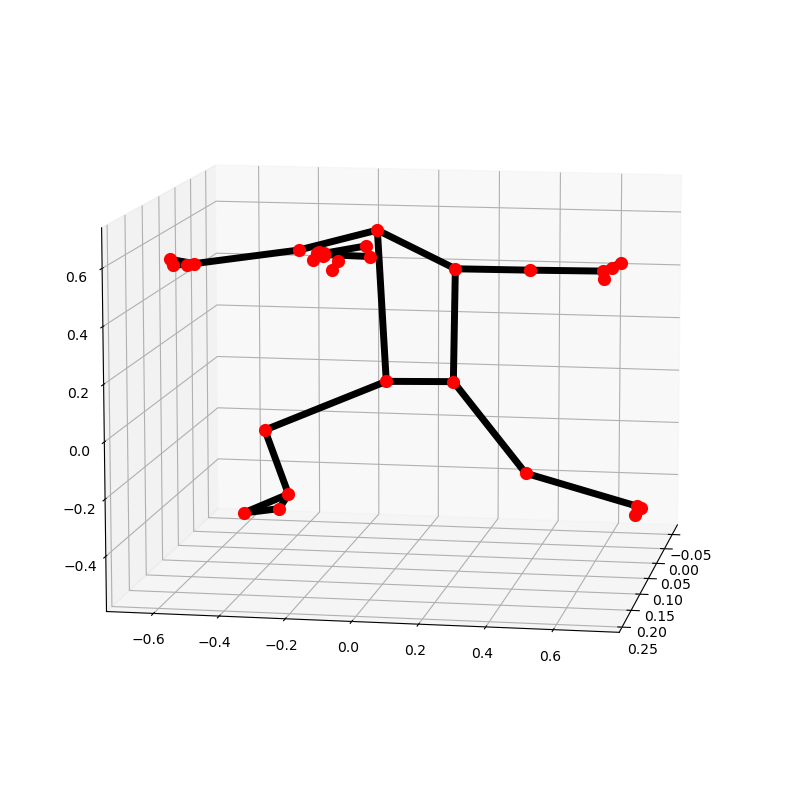

In [12]:
image = cv2.imread('images/img3.jpg')
detectPose(image, pose, display =True)

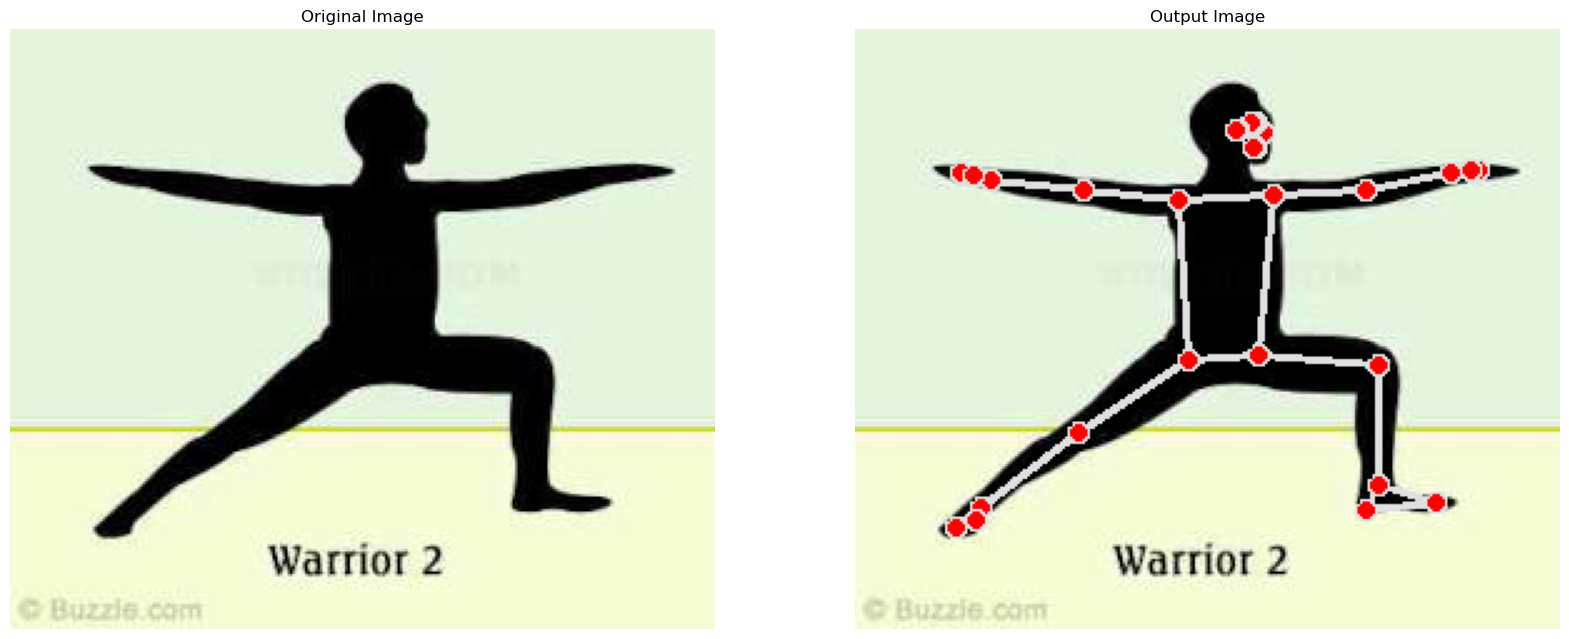

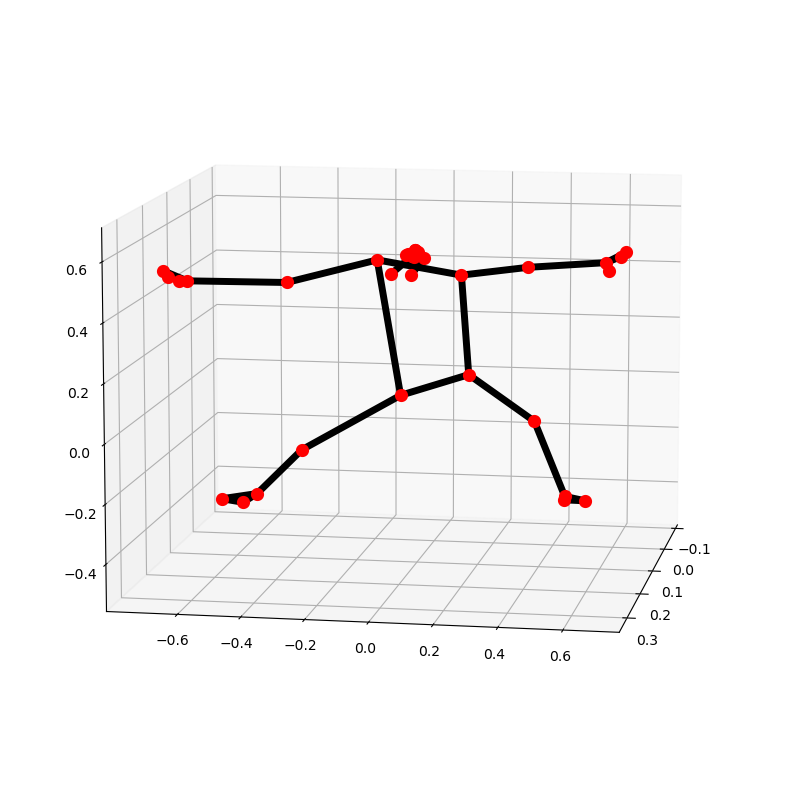

In [15]:
image = cv2.imread('images/img5.jpg')
detectPose(image, pose, display =True)

In [14]:
#Now working on realtime video
pose_video = mp_pose.Pose(static_image_mode = False, min_detection_confidence = 0.5, model_complexity = 1)
#initializing video capturing object for webcam
video = cv2.VideoCapture(0)
#creating named window for resizing purposes
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

#initializing the video capturing object for video stored in the disk
#video = cv2.VideoCapture('video/vid1.mp4')

#setting the video camera size
video.set(3,1280)
video.set(4,960)

#storing time of the previous frame 
time1 = 0

#iterating the video
while video.isOpened():
    #reading the frame
    ok, frame = video.read()
    if not ok:
        break

    #for selfie mirror view
    frame = cv2.flip(frame,1)
    frame_height, frame_width, _ = frame.shape

    #resizing the frame while keeping the aspect ratio
    frame = cv2.resize(frame, (int(frame_width*(640/frame_height)), 640))

    #performing pose landmark detection
    frame, _ = detectPose(frame, pose_video, display = False)

    time2 = time()
    if (time2-time1)>0:
        frames_per_second = 1.0/(time2-time1)

        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10,30), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 3)

    time1 = time2

    cv2.imshow('Pose Detection', frame)
    k = cv2.waitKey(1) & 0xFF
    #pressing ESC key will break
    if (k==27):
        break

video.release()
cv2.destroyAllWindows()